In [1]:
import tensorflow as tf

print(tf.__version__)

2.3.1


In [2]:
# 이벤트 발생에 따라 콜백 동작 처리.
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    # loss < 0.4 일 때, 학습 종료.
    if(logs.get('loss') < 0.4):
      print("\nLoss is low, so cancelling training!")
      self.model.stop_training = True

In [3]:
# fashion mnist 데이터 로드.
fashion_mnist = tf.keras.datasets.fashion_mnist

# 의류 품목과 라벨이 담긴 그래픽 이미지 값을 Training Set 과 Test Set으로 구분.
(training_images, training_labels), (test_images, test_labels) = fashion_mnist.load_data()

라벨명 :  3
[[  0   0   0   0   0   0   0   0  33  96 175 156  64  14  54 137 204 194 102   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  73 186 177 183 175 188 232 255 223 219 194 179 186 213 146   0   0   0   0   0   0   0]
 [  0   0   0   0   0  35 163 140 150 152 150 146 175 175 173 171 156 152 148 129 156 140   0   0   0   0   0   0]
 [  0   0   0   0   0 150 142 140 152 160 156 146 142 127 135 133 140 140 137 133 125 169  75   0   0   0   0   0]
 [  0   0   0   0   0  54 167 146 129 142 137 137 131 148 148 133 131 131 131 125 140 140   0   0   0   0   0   0]
 [  0   0   0   0   0   0 110 188 133 146 152 133 125 127 119 129 133 119 140 131 150  14   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 221 158 137 135 123 110 110 114 108 112 117 127 142  77   0   0   0   0   0   0   0]
 [  0   0   0   0   0   4   0  25 158 137 125 119 119 110 117 117 110 119 127 144   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 123 156 129 112 110 102 112 100 121 1

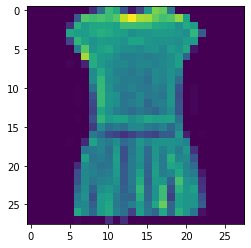

In [4]:
# 출력되는 수치값을 정확하게 보기위한 np.set_printoptions(linewidth=200).
import numpy as np
np.set_printoptions(linewidth=200)

import matplotlib.pyplot as plt

plt.imshow(training_images[3])
print("라벨명 : ", training_labels[3])
print(training_images[3])

In [5]:
# 정규화(normalizing) : 신경망에서는 0과 1사이의 숫자의 데이터가 다루기 쉽다.
training_images = training_images / 255.0
test_images = test_images /255.0

**Sequential**: 신경망계층 Sequential 모델로 생성.
> Sequential 모델은 각 레이어에 정확히 하나의 입력 텐서와 하나의 출력 텐서가 있는 일반 레이어 스택에 적합.

**Flatten**: 이미지 형태의 데이터를 1차원 셋으로 변경.

**Dense**: 뉴런 층 추가.

**Relu** : 활성화 함수의 종류. 0보다 작은 값이 나온 경우 0을 반환하고, 0보다 큰 값이 나온 경우 그 값을 그대로 반환.

**Softmax** 활성화 함수의 종류. 입력받은 값을 0~1사이의 값으로 모두 정규화하여 출력. 따라서, 출력 값들의 총합은 항상 1이 되는 특성을 가짐.

In [6]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [7]:
# 콜백을 위해 생성한 클래스를 인스턴스화
callbacks = myCallback()

In [8]:
# 학습을 목적으로 모델 정의.
# 최적화 함수(optimizer) : Adam(), 목적함수 f의 최솟값을 찾는 알고리즘
# 손실 함수(loss) : sparse_categorical_crossentropy(다중 분류 손실함수), 한 샘플에 여러 클래스가 있거나 label이 soft 확률일 경우 사용.
# 측정 함수(metrics) : accuracy
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5, callbacks = [callbacks])

Epoch 1/5
1875/1875 [==============================] - 1s 698us/step - loss: 0.5030 - accuracy: 0.8244
Epoch 2/5
1864/1875 [============================>.] - ETA: 0s - loss: 0.3763 - accuracy: 0.8658
Reached 60% accuracy so cancelling training!
1875/1875 [==============================] - 1s 740us/step - loss: 0.3758 - accuracy: 0.8659


In [9]:
# 테스트 데이터를 가지고 평가.
model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 529us/step - loss: 0.4048 - accuracy: 0.8527


[0.40479204058647156, 0.8526999950408936]